Take Home Assignment 3

3.0 Install any dependencies if needed


In [3]:
!pip install supervision
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu

In [4]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import time
import supervision as sv

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


3.1.1 Draw the segmentation mask of the largest car: Use ultralytics library only

In [7]:
img_path = "demo5_images/cars1.jpg"
img = cv2.imread(img_path)


0: 416x640 14 cars, 812.2ms
Speed: 13.6ms preprocess, 812.2ms inference, 74.5ms postprocess per image at shape (1, 3, 416, 640)


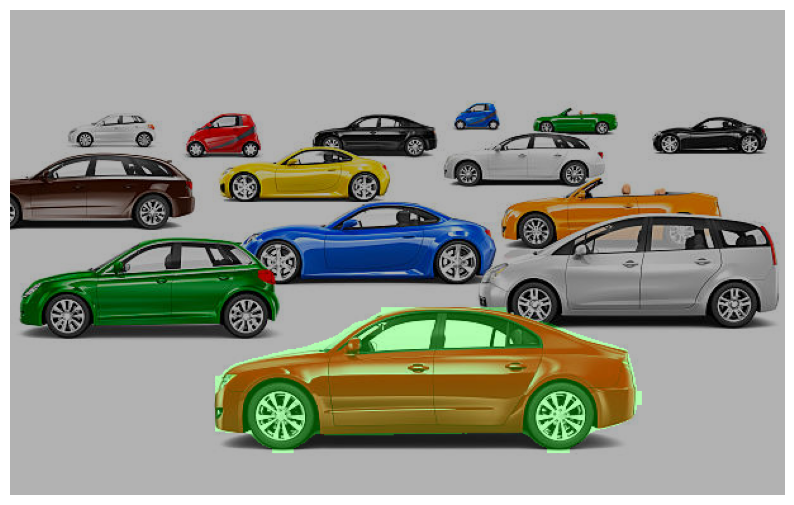

In [8]:
# Load the YOLOv8 segmentation model
model = YOLO("yolov8s-seg.pt")  # You can use 'yolov8m-seg.pt' or 'yolov8l-seg.pt' for better accuracy


# Ensure image is loaded correctly
if img is None:
    raise ValueError(f"Error: Could not load image at {img_path}")

# Convert BGR to RGB for displaying
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run the model on the image
results = model(img)

# Initialize variables to store the largest car mask
largest_area = 0
largest_mask = None

# Iterate through the detected objects
for result in results:
    for box, mask in zip(result.boxes.xyxy, result.masks.xy):
        x1, y1, x2, y2 = box  # Get bounding box coordinates
        area = (x2 - x1) * (y2 - y1)  # Compute area

        if area > largest_area:
            largest_area = area
            largest_mask = mask

# Draw the largest segmentation mask if found
if largest_mask is not None:
    mask_img = np.zeros_like(img_rgb, dtype=np.uint8)  # Create an empty mask image
    cv2.fillPoly(mask_img, [np.array(largest_mask, np.int32)], (0, 255, 0))  # Fill the mask with green color

    # Overlay mask on the original image
    output = cv2.addWeighted(img_rgb, 0.7, mask_img, 0.3, 0)

    # Display the output image in Colab
    plt.figure(figsize=(10, 10))
    plt.imshow(output)
    plt.axis("off")
    plt.show()

3.1.2 Draw the segmentation mask of the largest car : Use ultralytics + supervision libraries


0: 416x640 14 cars, 979.8ms
Speed: 5.9ms preprocess, 979.8ms inference, 66.5ms postprocess per image at shape (1, 3, 416, 640)


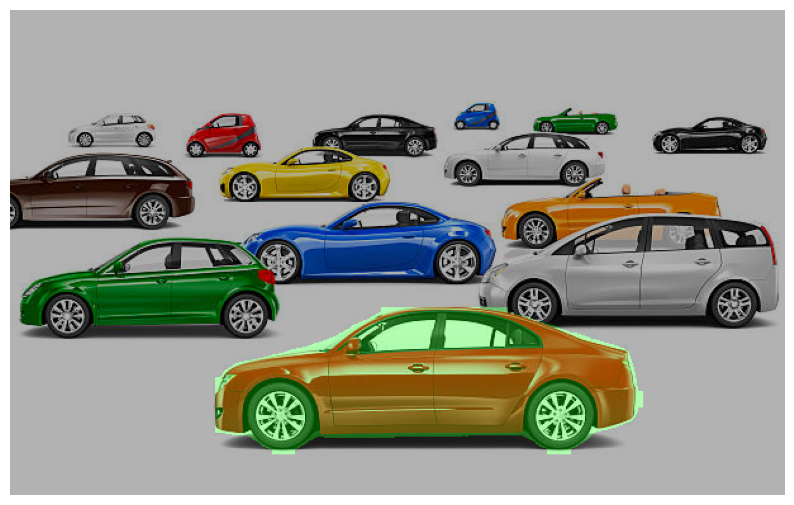

In [10]:

# Load the YOLOv8 segmentation model
model = YOLO("yolov8s-seg.pt")  # You can use 'yolov8m-seg.pt' or 'yolov8l-seg.pt' for better accuracy

# Read the image
img_path = "demo5_images/cars1.jpg"
img = cv2.imread(img_path)

# Ensure image is loaded correctly
if img is None:
    raise ValueError(f"Error: Could not load image at {img_path}")

# Convert BGR to RGB for displaying
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run the model on the image
results = model(img)

# Transfer results to supervision
detections = sv.Detections.from_ultralytics(results[0])

# Initialize variables to store the largest car mask
largest_area = 0
largest_mask = None

# Iterate through the detected objects
for mask in detections.mask:
    if mask is not None:
        x, y, w, h = cv2.boundingRect(mask.astype(np.uint8))  # Get bounding box
        area = w * h  # Compute area

        if area > largest_area:
            largest_area = area
            largest_mask = mask

# Display the largest segmentation mask if found
if largest_mask is not None:
    mask_img = np.zeros_like(img_rgb, dtype=np.uint8)  # Create an empty mask image
    mask_img[largest_mask.astype(bool)] = (0, 255, 0)  # Fill the mask with green color

    # Overlay mask on the original image
    output = cv2.addWeighted(img_rgb, 0.7, mask_img, 0.3, 0)

    # Display the output image
    plt.figure(figsize=(10, 10))
    plt.imshow(output)
    plt.axis("off")
    plt.show()

3.2 Estimate distance to centroid of chair

In [19]:
from ultralytics import YOLO
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from Depth_Anything_V2.depth_anything_v2.dpt import DepthAnythingV2
import torchvision.transforms as transforms

# Load YOLOv8 object detection model
model = YOLO("yolov8s.pt")  # Ensure correct path if using a custom model

# Load Depth Anything V2 model
depth_model = DepthAnythingV2(encoder="vitb").cuda()  # Move to GPU if available
depth_model.eval()

# Read and preprocess the image
img_path = "demo5_images/kingChair.jpg"
img = cv2.imread(img_path)

# Ensure image is loaded correctly
if img is None:
    raise ValueError(f"Error: Could not load image at {img_path}")

# Convert BGR (OpenCV) to RGB (Matplotlib uses RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run YOLO detection
results = model(img)

# Find the chair detection
chair_box = None
for result in results:
    for box in result.boxes.data:  # Access bounding box data
        x1, y1, x2, y2, conf, cls = box.tolist()
        if model.names[int(cls)] == "chair":  # Check if it's a chair
            chair_box = (x1, y1, x2, y2)
            break
    if chair_box is not None:
        break

# If no chair is found, exit
if chair_box is None:
    raise ValueError("No chair detected in the image.")

# Calculate centroid of the chair bounding box
x1, y1, x2, y2 = chair_box
centroid_x = int((x1 + x2) / 2)
centroid_y = int((y1 + y2) / 2)

# Preprocess image for Depth Anything V2
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Resize((384, 640)),  # Resize to model input shape
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

img_tensor = transform(img_rgb).unsqueeze(0).cuda()  # Add batch dimension and move to GPU

# Obtain depth map
with torch.no_grad():
    depth_map = depth_model(img_tensor).squeeze().cpu().numpy()  # Remove batch dim and move to CPU

# Resize depth map to match the original image dimensions
depth_map_resized = cv2.resize(depth_map, (img.shape[1], img.shape[0]))

# Query depth at centroid location
distance = depth_map_resized[centroid_y, centroid_x]

# Display results
plt.figure(figsize=(12, 6))

# Original Image with Chair Detection
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.scatter([centroid_x], [centroid_y], color='red', marker='x', s=100, label=f"Distance: {distance:.2f}m")
plt.title("Detected Chair")
plt.legend()
plt.axis("off")

# Depth Map Visualization
plt.subplot(1, 2, 2)
plt.imshow(depth_map_resized, cmap="plasma")
plt.scatter([centroid_x], [centroid_y], color='red', marker='x', s=100)
plt.title("Depth Map")
plt.colorbar()
plt.axis("off")

plt.show()

print(f"Estimated distance to chair: {distance:.2f} meters")


ModuleNotFoundError: No module named 'Depth_Anything_V2'

3.3.1  Draw bounding boxes around the "cars" using supervision.

In [17]:
# Downloads the video file from the google drive link, you'll have to "pip install gdown" first
import gdown

file_id = "1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4"
direct_url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(direct_url, "vehicles_video.mp4", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4
To: /content/vehicles_video.mp4
100%|██████████| 35.3M/35.3M [00:00<00:00, 72.8MB/s]


'vehicles_video.mp4'

In [18]:
model = YOLO("yolo11n.pt")


def callback(frame: np.ndarray, _: int) -> np.ndarray:
    # Complete this function

sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_tracking.mp4",
    callback=callback
)

IndentationError: expected an indented block after function definition on line 4 (<ipython-input-18-e8a55aa8e627>, line 7)

3.3.1 Track the cars. Add the tracker id to the bounding boxes around the cars. Use supervision

3.3.2 Draw the track traces for the tracked cars. Use supervision

Questions:

Explain what "def callback(frame: np.ndarray, _: int) -> np.ndarray:" does.

Answers: Complete this section